<b> MIS 382N: ADVANCED MACHINE LEARNING<b>

Assignment 2

Total points: 70

Due: Friday, September 23 to be submitted via Canvas by 11:59 pm

Your homework should be written in a python notebook. If you prefer, you can work in groups of two. **Please note that only one student per team needs to submit the assignment on Canvas but make sure to include both students' names and UT EIDs.**

For any question that requires a handwritten solution, you may upload scanned images of your solution in the notebook or attach them to the assignment . You may write your solution using markdown as well.

Please make sure your code runs and the graphs and figures are displayed in your notebook before submitting. (%matplotlib inline)

**Members:**

Shreyansh Agrawal : sa55742

Praneet Kumar Alamuri : pa22222


# Question 1: Bias and Variance (10 pts)

(a). (4 pts) Describe the difference between model bias and the bias of a point estimator. 

(b) (6 pts). How can you use a learning curve to determine whether a model is overfitting  (for a given sample size)? Discuss this with respect to the observed train and validation error curves. How does your answer change if the model you are trying to determine if the model is underfitting?

# Answer : 

(a)
Bias of a model how well the model fits the training data, i.e. if the error or misclassification is less, we expect model bias to be less.
Bias of a point estimator such as mean or variance is slightly different. When the exptected value of a point estimator differs from the estimate of a parameter (point estimator), then we say that the estimate is biased.
In a way, for point estimator, we are only comparing a single value whereas when we evaluate the bias of a model, we are trying to understand how well it fits to the entire training dataset.

(b) Overfitting:
	
In an overfit model, the model is fitting the training data very well but is unable to generalize well with the validation data. Through learning curve, if we can see that the training error is gradually increasing with increase in train size and its much lower than the validation error, there's a possible chance of overfitting.
The validation error would continue to go down, but might not converge with the test error.
Such models need additional data to stabilize.

Underfitting:

In an underfit model, the model performs poorly on both the validation and train sets. So both the error would be high. Through learning curve, we can see that the train error and validation error have a high gap and does not change much with increase in train size. With more training data, the validation error might slightly decrease and train error might increase slightly, but might also fail to stabilize. Such models need more complexity to understand the pattern in the data.


# Question 2: Bias-Variance Exploration (20 pts)
We want to build a model that can predict y for unknown inputs x.

(a) (10 pts) Fit polynomial models of degrees 2, 4, 7 to the training data. Print out the mean squared error (on both train and test sets) for all the models. Plot the data (y_train vs x_train and y_test vs x_test), the fitted models (predictions on x_all by different models vs x_all), and the predictions on the test set (predictions on x_test by different models vs x_test). All the plots must be in the same figure and be clearly labeled. Tips: you can use np.vander(np.squeeze(x_train), deg+1) to generate the deg-degree polynomial vector of x_train. For example, np.vander(np.squeeze(x_train), 3) gives you the second-degree polynomial of x_train.

(b) (5 pts) Which model gives the best performance? Explain in terms of the bias-variance tradeoff.

(c) (5 pts) Analyse how the training data size affects the bias and the variance of the models. For this, run the analysis in (a) using 20, 40, 60, 80 and all 100 data points. Make a single plot of the  𝑙𝑜𝑔(𝑀𝑆𝐸)  for both the training and the test data vs the size of the training set for each of the polynomials. State the trends you see as you change the size of the training data on each of the models and explain why you see them. You can use the following codes to load the dataset and complete the analysis:

In [1]:
from sklearn import linear_model as lm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

#added pandas
import pandas as pd

In [ ]:
# Only use this code block if you are using Google Colab.
# If you are using Jupyter Notebook, please ignore this code block. You can directly upload the file to your Jupyter Notebook file systems.
from google.colab import files

## It will prompt you to select a local file. Click on “Choose Files” then select and upload the file. 
## Wait for the file to be 100% uploaded. You should see the name of the file once Colab has uploaded it.
uploaded = files.upload()

Saving data.npy to data.npy


In [2]:
data_load = np.load('./data.npy', allow_pickle = True)

In [3]:
x_train = data_load.item().get("Xtrain")
y_train = data_load.item().get("Ytrain")
x_test = data_load.item().get("Xtest")
y_test =data_load.item().get("Ytest")
x_all = np.linspace(-10,10,101).reshape(-1,1)

#updated it, although it won't make any diff
#lrp = LinearRegression()

lrp = LinearRegression(fit_intercept=False)

Part A

In [7]:
def create_poly_df(vec,poly):

    test_df = pd.DataFrame(zip(list(np.vander(np.squeeze(vec),poly+1))), columns=['a'])
    test_df.columns = ['a']
    col_list = []

    for i in range(0,poly+1):
        col_list.append("x"+str(i))

    col_list.reverse()
    
    test_df_2 = pd.DataFrame(columns=col_list)
    test_df_2[col_list] = pd.DataFrame(test_df['a'].to_list(), index=test_df.index)

    return test_df_2

def plot_curves(x_train, y_train, x_test, y_test, charts = False):
  # Fit polynomial models of degrees 2, 4, 7 to the training data. 
  # Print out the mean squared error (on both train and test sets) for all the models. 
  # Plot the data (y_train vs x_train and y_test vs x_test), the fitted models (predictions on x_all by different models vs x_all), and the predictions on the test set (predictions on x_test by different models vs x_test). 

    # YOUR CODE COMES HERE
    #print("IMPLEMENT ME!")

    poly_list = [2,4,7]

    test_mse_list = []
    train_mse_list = []

    test_pred_df = pd.DataFrame(columns=['X','Deg_2','Deg_5','Deg_7'])
    train_pred_df = pd.DataFrame(columns=['X','Deg_2','Deg_5','Deg_7'])
    x_all_pred_df = pd.DataFrame(columns=['X','Deg_2','Deg_5','Deg_7'])

    test_pred_df['X'] = pd.Series(x_test)
    train_pred_df['X'] = pd.Series(x_train)
    x_all_pred_df['X'] = pd.Series(x_all.ravel())

    for poly in poly_list:
      
      # creating a d degree polynomial
      x_train_df = create_poly_df(x_train,poly)
      x_test_df = create_poly_df(x_test,poly)

      #fitting the model on train data
      train_fit = lrp.fit(x_train_df,y_train)

      #predicting train data
      train_pred = train_fit.predict(x_train_df)
      col_name = 'Deg_'+str(poly)
      train_pred_df[col_name] = pd.Series(train_pred)

      #predicting train data
      test_pred = train_fit.predict(x_test_df)
      test_pred_df[col_name] = pd.Series(test_pred)

      #calculating MSE
      train_mse = mean_squared_error(train_pred, y_train)
      test_mse = mean_squared_error(test_pred, y_test)

      train_mse_list.append(train_mse)
      test_mse_list.append(test_mse)

      #predictions on x_all by d degree polynomial
      x_all_df = create_poly_df(x_all,poly)

      #predicting x_all data
      x_all_pred = train_fit.predict(x_all_df)
      x_all_pred_df[col_name] = pd.Series(x_all_pred)

    # Sorting the dataframes to plot line curve
    test_pred_df.sort_values(by='X', inplace=True)
    train_pred_df.sort_values(by='X', inplace=True)
    x_all_pred_df.sort_values(by='X',inplace=True)

    if charts==True:
    #plotting predictions on x_all
        for poly in poly_list:
            col_name = 'Deg_'+str(poly)
            plt.plot(x_all_pred_df['X'],x_all_pred_df[col_name], label=col_name)

        plt.xlabel("x_all")
        plt.ylabel("Predicted Y")
        plt.title("Predicted Y vs x_all on all models")
        plt.legend()
        plt.show()

        #plotting predictions on x_test
        for poly in poly_list:
            col_name = 'Deg_'+str(poly)
            plt.plot(test_pred_df['X'],test_pred_df[col_name], label=col_name)

        plt.xlabel("x_test")
        plt.ylabel("Predicted Y")
        plt.title("Predicted Y vs x_test on all models")
        plt.legend()
        plt.show()


    return train_mse_list, test_mse_list


Part B

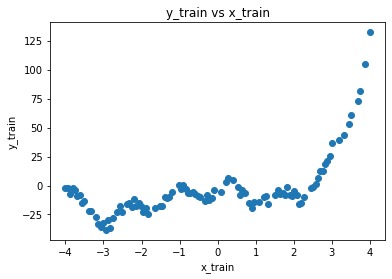

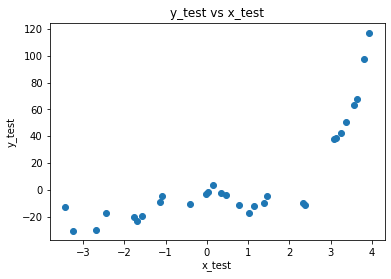

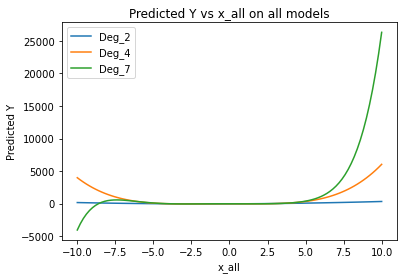

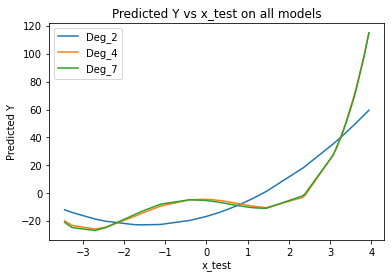

Degree 2 Train RMSE: 247.2967979737153 ,Test RMSE : 320.06408346977855
Degree 4 Train RMSE: 31.720018057290048 ,Test RMSE : 31.29208288660671
Degree 7 Train RMSE: 30.67719359210973 ,Test RMSE : 33.41069407769017


In [8]:
# Fit the different polynomials to the training data and make the plots 
poly_list = [2,4,7]

#plotting x,y for train 
plt.scatter(x_train, y_train)
plt.title("y_train vs x_train")
plt.xlabel("x_train")
plt.ylabel("y_train")
plt.show()

#plotting x,y for test 
plt.scatter(x_test, y_test)
plt.title("y_test vs x_test")
plt.xlabel("x_test")
plt.ylabel("y_test")
plt.show()

#fitting the curves on diff polynomial degrees and observing the fit
train_rmses_100, test_rmses_100 = plot_curves(x_train, y_train, x_test, y_test, charts=True)

for i in range(0,3):
    print("Degree " + str(poly_list[i])+" Train RMSE: " +str(train_rmses_100[i]) + ' ,Test RMSE : ' + str(test_rmses_100[i]))


From the above graphs and test/train RMSEs we can infer that - 
* Degree 2 polynomial has the highest test and train error and hence it has high bias (underfit model)
* Degree 4 polynomial has lowest test and low train error. Interesting thing is test error and train error are more or less same, hence our model is very well generalized. It's the best fit model
* Degree 7 polynomial has the lowest train error but slightly higher test error indicating that the model is has relatively high variance (slightly overfit)

Based on Bias-Variance tradeoff, we select Degree 4 polynomial fit as the best model

Part C

20% data
40% data
60% data
80% data
100% data


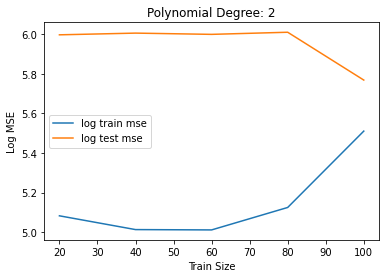

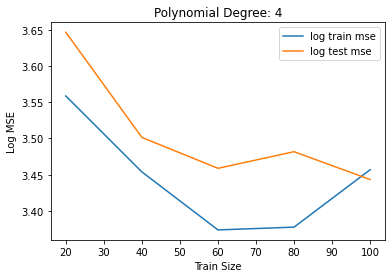

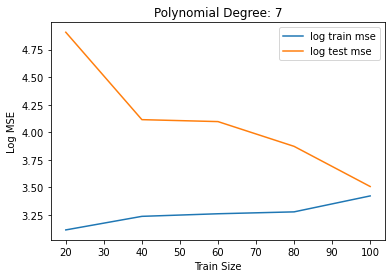

In [9]:
# Study the effects of the training data size on the bias and variance
print("20% data")
train_rmses_20, test_rmses_20 = plot_curves(x_train[40:60], y_train[40:60], x_test, y_test, charts=False)
print("40% data")
train_rmses_40, test_rmses_40 = plot_curves(x_train[30:70], y_train[30:70], x_test, y_test, charts=False)
print("60% data")
train_rmses_60, test_rmses_60 = plot_curves(x_train[20:80], y_train[20:80], x_test, y_test,charts=False)
print("80% data")
train_rmses_80, test_rmses_80 = plot_curves(x_train[10:90], y_train[10:90], x_test, y_test,charts=False)
print("100% data")
train_rmses_100, test_rmses_100 = plot_curves(x_train, y_train, x_test, y_test,charts=False)

#combining all the errors to plot the chart
batch_list = [20,40,60,80,100]
train_master = np.array([train_rmses_20, train_rmses_40, train_rmses_60, train_rmses_80, train_rmses_100])
test_master = np.array([test_rmses_20, test_rmses_40, test_rmses_60, test_rmses_80, test_rmses_100])

#plotting the learning curves for each degree polynomial
for i in range(3):

    plt.plot(batch_list, np.log(train_master.T)[i],label='log train mse')
    plt.plot(batch_list, np.log(test_master.T)[i],label='log test mse')
    plt.title("Polynomial Degree: " + str(poly_list[i]))
    plt.xlabel("Train Size")
    plt.ylabel("Log MSE")
    plt.legend()
    plt.show()


Polynomial Degree 2

* We can see that the gap between the test and train error is high, and does not converge till the end of the plot - this indicates underfitiing
* As we increase the train size, the degree 2 polynomial's train error increases rapidly.
* Interesting thing is that the test error does not do down for the major part of graph indicating the model is not improving on adding more training data
* This model has low variance but high bias

Polynomial Degree 4

* Gap b/w the test and train error is low since the start of the graph (low train size) and also converges at the end of the plot. This indicates if we use 100% of train data on this dataset, our model is very well generalized on the test data indicating its the optimal model.
* As we feed more data to the mode, we can see that the model is improving on its test error and stabalizes (more or less) post 60% of training data.
* This model has the best balance b/w bias and variance amongst the 3 model options

Polynomial Degree 7

* Gap b/w the test and train error is high at the start but becomes very low towards the end of the plot. If we would have more data points, test and train error of this higher degree polynomial would have converged. Which is a typical behaviour with more complex models - that they need more training data to stabalize.
* This model has slightly high variance than Polynomial degree 4 model.
* As the train size increases, the test error goes down indicating model is improving as we feed more data to train.

# Answer : 

# Question 3: Stochastic Gradient Descent Improvements (10 pts)

1. (5 pts) Read this [blog](https://medium.com/optimization-algorithms-for-deep-neural-networks/gradient-descent-with-momentum-dce805cd8de8) on medium and describe in your own words how momentum leads to a faster convergence of the loss function. 

2. (5 pts) Read this [blog](https://sweta-nit.medium.com/batch-mini-batch-and-stochastic-gradient-descent-e9bc4cacd461) on medium and explain in your own words the advantages of Mini-batch Stochastic Gradient Descent. 


Answer 3 | Part 1

The key value of Gradient Descent with Momentum is that it is faster and it accelerates the optimization process when compared to a normal gradient descent and it also helps create smoother steps when maneuvering towards the minima.

The main problem with Gradient Descent is that we can have multiple big vertical oscillations and the progression can bounce around when going towards the minima (sometimes even uphill depending on the gradient of specific points) which slows down our gradient descent. And if the we use a low learning rate then the convergence can take a lot of time.

Additionally, gradient descent can also lead to sub-optimal progression in case the gradient has high variance (i.e. noisy), or if the search space is flat or if we are facing a high curvature.

Adding momentum to our Gradient Descent can solve the above mentioned problems. GD with momentum adds an additional hyperparameter that brings in the history when carving out the progression towards minima. It updates GD's weights by taking an exponentially weighted average of dW and dB instead of directly updating it with dW & dB. In other words, the update in gradient at each step will add the change used at the previous step weighted by the momentum hyperparameter, which leads to dampening out the change in gradient in turn the vertical oscillations. This leads to getting smoother steps towards convergence with a relatively straightforward path and increasing speed as well.

Answer 3 | Part 2

In both Gradient Descent every epoch is calculated over the entire dataset thus making them computationally very expensive and time consuming. Even in Batch gradient descent, while we create batches BGD follows backward propogation on the summation of all the losses thus the model is updated only after running over the entire dataset.

Whereas, in Mini-Batch Gradient Descent, we do not wait for the entire dataset, we just pass the particular batch (of size n) in question with random samples (n) and then optimize for cost function which is now 1 epoch instead of the the entire dataset. This leads to the following advantages -

1) This allows both efficiency and leads to lesser memory usage 2) Model update frequency is higher than Gradient Descent as it updates after every mini-batch 3) Its computationally more efficient than Gradient Descent/ SGD

# Answer : 

# Question 4: Stochastic Gradient Descent (30 pts)

1.(**10 pts**) Stochastic gradient descent derivation<br>

Use stochastic gradient descent to derive the coefficent updates for the 4 coefficients $w_0, w_1, w_2, w_3$ in this model：

$$ y = w_0 + w_1e^{-x_1} + w_2 x_1 + w_3x_1x_2 $$ 


2.(**20 pts**) Stochastic gradient descent coding <br>

Code an SGD solution in Python for this non-linear model$$ y = w_0 + w_1e^{-x_1} + w_2x_1 + w_3x_1x_2 $$  The template of the solution class is given. The init function of the class takes as input the learning rate, regularization constant and number of epochs. The fit method must take as input X, y. The predict method takes an X value (optionally, an array of values). 

a) (**15 pts**) Use the expression derived in part 1 to predict the data given in 'SGD_samples.csv', for 15 epochs, using learning rates: [0, .0001, .001, .01, 0.1, 1, 10, 100] and regularization (ridge regression) constants: [0,10,100]. For the best 2 combinations of learning_rate and regularization for SGD, plot MSE and the $w$ parameters as a function of epoch (for 15 epochs) . 

b) (**5 pts**) Report the MSE of the two best combinations of learning rate and regularization constant.

Q4 | Part 1

Uploaded a PDF named "AML HW2 Q4 Part A" for the derivation required on Part 1 of this question.

In [ ]:
# Only use this code block if you are using Google Colab.
# If you are using Jupyter Notebook, please ignore this code block. You can directly upload the file to your Jupyter Notebook file systems.
from google.colab import files

## It will prompt you to select a local file. Click on “Choose Files” then select and upload the file. 
## Wait for the file to be 100% uploaded. You should see the name of the file once Colab has uploaded it.
uploaded = files.upload()

Q4 | Part 2

In [16]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class Regression:
    
    def __init__(self, learning_rate, regularization, n_epoch):
        self.learning_rate = learning_rate
        self.n_epoch = n_epoch
        self.regularization = regularization
        # initialize whichever variables you would need here
        self.coef = np.zeros(4)
        #self.coefs = []
        
    def sgd(self, gradient):
        self.coef  = self.coef - self.learning_rate*gradient
        # = please put your codes here to update the self.coef using SGD
    
    def fit(self, X, y, update_rule='sgd', plot=False):
        mse = []
        
        coefs = []
        X = self.get_features(X)
        reg_grad = np.zeros(4)

        for epoch in range(self.n_epoch):
            
            for i in range(X.shape[0]):
                reg_grad[0] = 0
                reg_grad[1] = 2*self.regularization*self.coef[1]
                reg_grad[2] = 2*self.regularization*self.coef[2]
                reg_grad[3] = 2*self.regularization*self.coef[3]

                #print(reg_grad)

                y_hat = np.dot(self.coef,X[i])
                dl_dy_hat = 2 * (y_hat-y[i])

                #print(dl_dy_hat)
                #print(x[i])

                gradient = X[i]*dl_dy_hat
                
                #print(gradient)
                
                gradient = gradient+reg_grad
                
               
                # Update weights
                self.sgd(gradient)

            coefs.append(self.coef)
            residuals = y - self.linearPredict(X)         
            mse.append(np.mean(residuals**2))
            
        self.lowest_mse = min(mse)
        

        if plot == True:
            plt.figure()
            plt.plot(range(self.n_epoch),mse)
            plt.xlabel('epoch')
            plt.ylabel('MSE')
            plt.figure()
            coefs = np.array(coefs)
            plt.plot(range(self.n_epoch),coefs[:,0],label='w0')
            plt.plot(range(self.n_epoch),coefs[:,1],label='w1')
            plt.plot(range(self.n_epoch),coefs[:,2],label='w2')
            plt.plot(range(self.n_epoch),coefs[:,3],label='w3')
            plt.legend()
            plt.xlabel('epoch')
            plt.ylabel('parameter value')

    def get_features(self, X):
        '''
        this output of this function can be used to compute the gradient in `fit`
        '''
        x = np.zeros((X.shape[0], 4))
        x[:,0] = 1
        x[:,1] = np.exp(-X[:,0])
        x[:,2] = X[:,0]
        x[:,3] = X[:,0]*X[:,1]
        
        return x
        
    def linearPredict(self, X):  
      #compute the dot product of self.coef and X
      return np.dot(X, self.coef) #this line is just a placeholder, please delete this line in your code        

In [17]:
data = pd.read_csv('SGD_samples.csv')
X = np.array([data['x1'].values, data['x2'].values]).T
y = data['y'].values
n_epochs = 15
learning_rate = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
regularization = [0, 10, 100]

In [18]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

#looping through the learning_rate and regularization constant to get the best two combination
mse_list = []
dict_mse_l_r = {}
for l in learning_rate:
    for r in regularization:
        a = Regression(l, r, n_epochs)
        a.fit(X=X,y=y)
        
        dict_mse_l_r[str(l)+" , "+str(r)]=a.lowest_mse

        mse_list.append(a.lowest_mse)

#determining the best mse
mse_vals = list(dict_mse_l_r.values())
key_vals = list(dict_mse_l_r.keys())
min_mse = min(mse_vals)
best_set = key_vals[mse_vals.index(min_mse)]

#determining the second best mse
mse_vals_2 = mse_vals.copy()
mse_vals_2.sort(reverse=False)
second_best = key_vals[mse_vals.index(mse_vals_2[1])]

#displaying the output
print("Learning Rate , Regularization")
print(best_set, ' | ' ,second_best)
        

Learning Rate , Regularization
0.01 , 0  |  0.001 , 0


Part A

So the two best set of learning rate and regularization are as follows:
* Best : Learning Rate=0.01 and Regularization = 0
* Second Best: Learning Rate=0.001 and Regularization = 0

Given we do not have test data and we are only evaluating the model performance on train, getting the best performance on zero regularization makes sense.

Now we can obseve the MSEs and weight updates for these two.

Best : Learning Rate=0.01 and Regularization = 0 



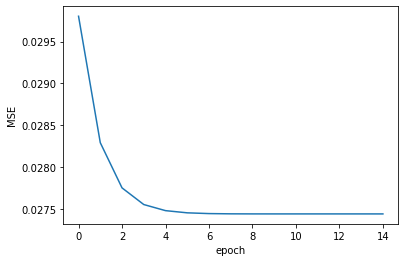

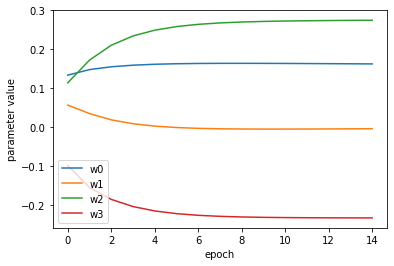

In [19]:
print("Best : Learning Rate=0.01 and Regularization = 0 \n")
best_r = Regression(0.01,0,15)
best_r.fit(X=X,y=y,plot=True)

Second Best : Learning Rate=0.001 and Regularization = 0 



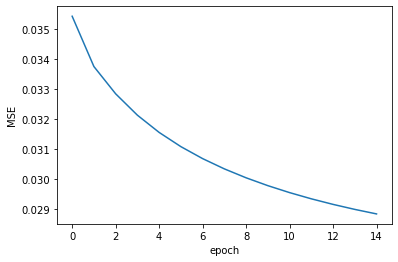

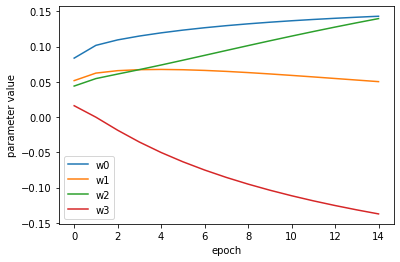

In [20]:
print("Second Best : Learning Rate=0.001 and Regularization = 0 \n")

second_best_r = Regression(0.001,0,15)
second_best_r.fit(X=X,y=y,plot=True)


Part B

In [21]:
print("Best : Learning Rate=0.01 and Regularization = 0 " + str(best_r.lowest_mse))
print("Second Best : Learning Rate=0.001 and Regularization = 0 " + str(second_best_r.lowest_mse))

Best : Learning Rate=0.01 and Regularization = 0 0.027444548002430152
Second Best : Learning Rate=0.001 and Regularization = 0 0.028842167362254173
